In [1]:
import dash
import dash_html_components as html
import dash_core_components as dcc
from datetime import datetime as dt
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.externals import joblib
%matplotlib inline

In [2]:
df = pd.read_csv('../../clean_data/FinalData_for_Models.csv')

In [3]:
loaded_model = joblib.load("../Pickle/model_stack_noxgb.pkl")

In [4]:
from IPython import display
def show_app(app,  # type: dash.Dash
             port=9999,
             width=700,
             height=350,
             offline=True,
             style=True,
             **dash_flask_kwargs):
    """
    Run the application inside a Jupyter notebook and show an iframe with it
    :param app:
    :param port:
    :param width:
    :param height:
    :param offline:
    :return:
    """
    url = 'http://localhost:%d' % port
    iframe = '<iframe src="{url}" width={width} height={height}></iframe>'.format(url=url,
                                                                                  width=width,
                                                                                  height=height)
    display.display_html(iframe, raw=True)
    if offline:
        app.css.config.serve_locally = True
        app.scripts.config.serve_locally = True
    if style:
        external_css = ["https://fonts.googleapis.com/css?family=Raleway:400,300,600",
                        "https://maxcdn.bootstrapcdn.com/font-awesome/4.7.0/css/font-awesome.min.css",
                        "http://getbootstrap.com/dist/css/bootstrap.min.css", ]

        for css in external_css:
            app.css.append_css({"external_url": css})

        external_js = ["https://code.jquery.com/jquery-3.2.1.min.js",
                       "https://cdn.rawgit.com/plotly/dash-app-stylesheets/a3401de132a6d0b652ba11548736b1d1e80aa10d/dash-goldman-sachs-report-js.js",
                       "http://getbootstrap.com/dist/js/bootstrap.min.js"]

        for js in external_js:
            app.scripts.append_script({"external_url": js})

    return app.run_server(debug=False,  # needs to be false in Jupyter
                          port=port,
                          **dash_flask_kwargs)

In [3]:
app = dash.Dash()

app.layout = html.Div([
    html.Label('Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),

    html.Label('Multi-Select Dropdown'),
    dcc.Dropdown(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value=['MTL', 'SF'],
        multi=True
    ),

    html.Label('Radio Items'),
    dcc.RadioItems(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        value='MTL'
    ),

    html.Label('Checkboxes'),
    dcc.Checklist(
        options=[
            {'label': 'New York City', 'value': 'NYC'},
            {'label': u'Montréal', 'value': 'MTL'},
            {'label': 'San Francisco', 'value': 'SF'}
        ],
        values=['MTL', 'SF']
    ),

    html.Label('Text Input'),
    dcc.Input(value='MTL', type='text'),

    html.Label('Slider'),
    dcc.Slider(
        min=0,
        max=9,
        marks={i: 'Label {}'.format(i) if i == 1 else str(i) for i in range(1, 6)},
        value=5,
    ),
], style={'columnCount': 2})


In [17]:
app = dash.Dash()

app.layout = html.Div([
        
        
    html.Label('Date'),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=dt(2014, 1, 1),
        max_date_allowed=dt(2020, 12, 31),
        initial_visible_month=dt(2017, 12, 11),
        date=dt(2017, 12, 11)
    ),
    html.Div(id='output-container-date-picker-single'),    
        
    
    html.Label('Precipitation'),
    dcc.Dropdown(
        id='precipitation',
        options=[
            {'label': 'None', 'value': 0},
            {'label': 'Light', 'value': 0.04},
            {'label': 'Medium', 'value': 0.13},
            {'label': 'Heavy', 'value': 0.35}
        ],
        value=0
    ),

    html.Label('Weather Description'),
    dcc.Dropdown(
        id='weather',
        options=[
            {'label': 'Clear', 'value': 'clear'},
            {'label': 'Clouds', 'value': 'clouds'},
            {'label': 'Fog', 'value': 'fog'},
            {'label': 'Rain', 'value': 'rain'},
            {'label': 'Snow', 'value': 'snow'},
            {'label': 'Thunderstorm', 'value': 'thunderstorm'},
        ],
        value=['clear'],
        multi=True
    ),

#     html.Label('Radio Items'),
#     dcc.RadioItems(
#         options=[
#             {'label': 'New York City', 'value': 'NYC'},
#             {'label': u'Montréal', 'value': 'MTL'},
#             {'label': 'San Francisco', 'value': 'SF'}
#         ],
#         value='MTL'
#     ),

#     html.Label('Checkboxes'),
#     dcc.Checklist(
#         options=[
#             {'label': 'New York City', 'value': 'NYC'},
#             {'label': u'Montréal', 'value': 'MTL'},
#             {'label': 'San Francisco', 'value': 'SF'}
#         ],
#         values=['MTL', 'SF']
#     ),

    html.Label('Temperature (deg F)'),
    dcc.Input(id='temp', value=70, type='int'),

    html.Label('Hour of Day'),
    dcc.Slider(
        id='hour',
        min=0,
        max=23,
        marks={i: 'Hour {}'.format(i) if i == 1 else str(i) for i in range(0, 24)},
        value=10
        
        ),
            
        
    html.Div(id='Prediction'),
        
    dcc.Graph(id='graph_results')


        
])


@app.callback(
    dash.dependencies.Output('Prediction', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
     dash.dependencies.Input('precipitation', 'value'),
     dash.dependencies.Input('weather', 'value'),
     dash.dependencies.Input('temp', 'value'),
     dash.dependencies.Input('hour', 'value')])

def update_prediction(date, precipitation, weather, temp, hour):

    new_date = pd.to_datetime(date, format='%Y-%m-%d')
    month = new_date.month
    #array
    months = month_format(month)
    
    day = new_date.dayofweek
    #array
    days = day_format(day)
    
    #array
    weather_dummies = weather_format(weather)
    
    #Converting Fahrenheit to Python
    if temp == '':
        temp = 0.0
    
    temp_K = np.array([(float(temp) + 459.67)*(5.0/9.0)])
    
    #array
    hours = hour_format(hour)
    
    hol = is_holiday(date)
    
    #Getting average humidity at give month, day, hour
    humidity = np.array([df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), 'humidity'].mean()])
    wind_speed = np.array([df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), 'wind_speed'].mean()])
    
    #Getting average passengers and delays at given day, hour, holiday
    flight_info = df.loc[(df.Hour == hour) & (df.Day == day) & (df.holiday == hol), ['Passengers', 'Avg_Delay_Arriving', 'Cancelled_Departing_Flights']].mean()
    passengers, delays, cancellations = flight_info.values
    
    #Taking edge cases in case day = 0 or hour = 0 when solving prev hour info
    last_day = day
    last_2day = day
    
    last_hour = hour - 1
    last_2hour = hour - 2
    
    if hour == 0:
        last_hour = 23
        last_2hour = 22
        if day == 0:
            last_day = 6
            last_2day = 6
        else:
            last_day = day-1
            last_2day = day-1
    
    if hour == 1:
        last_2hour = 23
        if day == 0:
            last_2day = 6
        else:
            last_2day = day-1
        
    
    #Getting previous hours passenger info at given day, hour, holiday
    prev_hour_pass = np.array([df.loc[(df.Hour == last_hour) & (df.Day == last_day) & (df.holiday == hol), 'Passengers'].mean()])
    prev_2hour_pass = np.array([df.loc[(df.Hour == last_2hour) & (df.Day == last_2day) & (df.holiday == hol), 'Passengers'].mean()])
    
    
    hol_array = np.array([int(hol)])
    
    precipitation = np.array([precipitation])
    
    #Putting it in the right order
    feature_vect = np.concatenate((temp_K, humidity, wind_speed, np.array([passengers]), hol_array, precipitation, 
                                  np.array([delays]), np.array([cancellations]), weather_dummies, prev_hour_pass, 
                                  prev_2hour_pass, months, hours, days))
    #reshaping to be 2D
    feature_vect = feature_vect.reshape(1, len(feature_vect))

    return 'We estimate that {} taxis are needed at the airport under these conditions'.format(int(loaded_model.predict(feature_vect)))




@app.callback(
    dash.dependencies.Output('graph_results', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
     dash.dependencies.Input('hour', 'value')])
def update_graph(date, hour):
    
    new_date = pd.to_datetime(date, format='%Y-%m-%d')
    month = new_date.month
    day = new_date.dayofweek
    
    actual = df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), ['Unnamed: 0', 'num_pickups']]    
    actual.iloc[:,0] = pd.to_datetime(actual.iloc[:,0]).apply(lambda x: x.date())    
    
    return  {'data': [
                {'x': str(actual.iloc[:,0]), 'y': actual['num_pickups'], 'type': 'bar', 'name': 'actual'}]}
    

In [15]:
app = dash.Dash()

app.layout = html.Div([html.Div([
        
     # html.Img(src="https://cdn.newsday.com/polopoly_fs/1.12036027.1468362303!/httpImage/image.jpeg_gen/derivatives/landscape_1280/image.jpeg",
     #            style={
     #                'height': '100px',
     #                'float': 'right',
     #                'position': 'relative',
     #                'bottom': '40px',
     #                'left': '100px'
     #            },
     #            ),
    

    html.H1('Estimating Taxi Demand at LaGaurdia Aiport'
        ,style={
                    # 'position': 'relative',
                    # 'align' : 'center',
                    # 'top': '0px',
                    # 'left': '10px',
                    'font-family': 'Dosis',
                    # 'display': 'inline',
                    'font-size': '3.0rem',
                    'color': '#8A2BE2',
                    'margin': 'auto',
                    'margin-left':'40px'
                }
                )]),


    html.Div([html.Div([html.Label('Date', style={'position': 'relative',
                    # 'align' : 'center',
                    'top': '5px',
                    # 'left': '10px',
                    'font-family': 'Dosis',
                    'display': 'inline',
                    'font-size': '1.5rem',
                    'color': '#000000',
                    'margin': 'auto'
                    })]),
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=dt(2014, 1, 1),
        max_date_allowed=dt(2020, 12, 31),
        initial_visible_month=dt(2017, 12, 11),
        date=dt(2017, 12, 11)
    ),
    html.Div(id='my-date-picker-single', style={'position': 'relative',
                    # 'align' : 'center',
                    # 'top': '5px',
                    # # 'left': '10px',
                    # 'font-family': 'Dosis',
                    # # 'display': 'inline',
                    # 'font-size': '1.5rem',
                    # 'color': '#000000',
                    # 'margin': 'auto',
                    'margin-left': '100px', 'size':'20px', 'margin-bottom':'20px'}),
                     
    html.Label('Hour of Day', style={'position': 'relative',
                    # 'align' : 'center',
                    'top': '5px',
                    # 'left': '10px',
                    'bottom':'100px',
                    'font-family': 'Dosis',
                    'display': 'inline',
                    'font-size': '1.5rem',
                    'color': '#000000',
                    # 'margin': 'auto',
                    'margin-top':'100px'}),
    dcc.Slider(
        id='hour',
        min=0,
        max=23,
        marks={i: '1'.format(i) if i == 1 else str(i) for i in range(0, 24)},
        value=10
    ),
    html.Div(id='hour', style={'max-width':'50px','margin-right':'1000px'})
    ], style={'margin-top':'40px', 'margin-bottom':'40px', 'position':'relative'}),    
    
    html.Label('Precipitation', style={'position': 'relative',
                    # 'align' : 'center',
                    # 'top': '5px',
                    # 'float':'left',
                    'font-family': 'Dosis',
                    'display': 'inline',
                    'font-size': '1.5rem',
                    'color': '#000000',
                    'margin': 'auto'}),
    html.Div([dcc.Dropdown(
        id='precipitation',
        options=[
            {'label': 'None', 'value': 0},
            {'label': 'Light', 'value': 0.04},
            {'label': 'Medium', 'value': 0.13},
            {'label': 'Heavy', 'value': 0.35}
        ],
        value=0
    )], style={'position':'relative', 'margin-bottom':'30px'}),

    html.Label('Weather Description', style={'position': 'relative',
                    # 'align' : 'center',
                    # 'top': '5px',
                    # 'float':'left',
                    'font-family': 'Dosis',
                    'display': 'inline',
                    'font-size': '1.5rem',
                    'color': '#000000',
                    'margin': 'auto'}),
    html.Div([dcc.Dropdown(
        id='weather',
        options=[
            {'label': 'Clear', 'value': 'clear'},
            {'label': 'Clouds', 'value': 'clouds'},
            {'label': 'Fog', 'value': 'fog'},
            {'label': 'Rain', 'value': 'rain'},
            {'label': 'Snow', 'value': 'snow'},
            {'label': 'Thunderstorm', 'value': 'thunderstorm'},
        ],
        value=['clear'],
        multi=True
    )], style={'margin-bottom':'30px'}),

    html.Label('Temperature (deg F)', style={'position': 'relative',
                    # 'align' : 'center',
                    # 'top': '5px',
                    # 'float':'left',
                    'font-family': 'Dosis',
                    # 'display': 'inline',
                    'font-size': '1.5rem',
                    'color': '#000000',
                    'margin': 'auto'}),
    html.Div([dcc.Input(id='temp', value=70, type='int')], style={'height': '100px', 'width':'100px'}),         
        

            
        
    html.Div(id='Prediction'),
        
    dcc.Graph(id='graph_results')


        
], style={'columnCount': 3})


@app.callback(
    dash.dependencies.Output('Prediction', 'children'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
     dash.dependencies.Input('precipitation', 'value'),
     dash.dependencies.Input('weather', 'value'),
     dash.dependencies.Input('temp', 'value'),
     dash.dependencies.Input('hour', 'value')])

def update_prediction(date, precipitation, weather, temp, hour):

    new_date = pd.to_datetime(date, format='%Y-%m-%d')
    month = new_date.month
    #array
    months = month_format(month)
    
    day = new_date.dayofweek
    #array
    days = day_format(day)
    
    #array
    weather_dummies = weather_format(weather)
    
    #Converting Fahrenheit to Python
    if temp == '':
        temp = 0.0
    
    temp_K = np.array([(float(temp) + 459.67)*(5.0/9.0)])
    
    #array
    hours = hour_format(hour)
    
    hol = is_holiday(date)
    
    #Getting average humidity at give month, day, hour
    humidity = np.array([df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), 'humidity'].mean()])
    wind_speed = np.array([df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), 'wind_speed'].mean()])
    
    #Getting average passengers and delays at given day, hour, holiday
    flight_info = df.loc[(df.Hour == hour) & (df.Day == day) & (df.holiday == hol), ['Passengers', 'Avg_Delay_Arriving', 'Cancelled_Departing_Flights']].mean()
    passengers, delays, cancellations = flight_info.values
    
    #Taking edge cases in case day = 0 or hour = 0 when solving prev hour info
    last_day = day
    last_2day = day
    
    last_hour = hour - 1
    last_2hour = hour - 2
    
    if hour == 0:
        last_hour = 23
        last_2hour = 22
        if day == 0:
            last_day = 6
            last_2day = 6
        else:
            last_day = day-1
            last_2day = day-1
    
    if hour == 1:
        last_2hour = 23
        if day == 0:
            last_2day = 6
        else:
            last_2day = day-1
        
    
    #Getting previous hours passenger info at given day, hour, holiday
    prev_hour_pass = np.array([df.loc[(df.Hour == last_hour) & (df.Day == last_day) & (df.holiday == hol), 'Passengers'].mean()])
    prev_2hour_pass = np.array([df.loc[(df.Hour == last_2hour) & (df.Day == last_2day) & (df.holiday == hol), 'Passengers'].mean()])
    
    
    hol_array = np.array([int(hol)])
    
    precipitation = np.array([precipitation])
    
    #Putting it in the right order
    feature_vect = np.concatenate((temp_K, humidity, wind_speed, np.array([passengers]), hol_array, precipitation, 
                                  np.array([delays]), np.array([cancellations]), weather_dummies, prev_hour_pass, 
                                  prev_2hour_pass, months, hours, days))
    #reshaping to be 2D
    feature_vect = feature_vect.reshape(1, len(feature_vect))

    return 'We estimate that {} taxis are needed at the airport under these conditions'.format(int(loaded_model.predict(feature_vect)))




@app.callback(
    dash.dependencies.Output('graph_results', 'figure'),
    [dash.dependencies.Input('my-date-picker-single', 'date'),
     dash.dependencies.Input('hour', 'value')])
def update_graph(date, hour):
    
    new_date = pd.to_datetime(date, format='%Y-%m-%d')
    month = new_date.month
    day = new_date.dayofweek
    
    actual = df.loc[(df.Month == month) & (df.Day == day) & (df.Hour == hour), ['Unnamed: 0', 'num_pickups']]    
    actual.iloc[:,0] = pd.to_datetime(actual.iloc[:,0]).apply(lambda x: x.date())    
    
    return  {'data': [
                {'x': str(actual.iloc[:,0]), 'y': actual['num_pickups'], 'type': 'bar', 'name': 'actual'}]}
    

In [7]:
def day_format(day):
    days = np.zeros(7)
    days[day] = 1
    return days

In [8]:
def month_format(month):
    months = np.zeros(12)
    months[month-1] = 1
    return months

In [9]:
def weather_format(weather):
    array = np.zeros(6)
    if 'clear' in weather:
        array[0] = 1
    if 'clouds' in weather:
        array[1] = 1
    if 'fog' in weather:
        array[2] = 1
    if 'rain' in weather:
        array[3] = 1
    if 'snow' in weather:
        array[4] = 1
    if 'thunderstorm' in weather:
        array[5] = 1
    return array
        
#clear, clouds, fog, rain, snow, thunderstorm

In [10]:
# def hour_format(hour):
#     hours = np.zeros(24)
#     hours[hour] = 1
#     return hours

#new format
def hour_format(hour):
    hours = np.zeros(4)
    if hour < 7:
        hours[0] = 1
    elif hour < 13:
        hours[1] = 1
    elif hour < 19:
        hours[2] = 1
    else:
        hours[3] = 1
    return hours

In [11]:
def is_holiday(date):
    dr = pd.date_range(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-12-31'))
    cal = calendar()
    holidays = cal.holidays(start=dr.min(), end=dr.max())

    return date in holidays

In [18]:
show_app(app)

 * Running on http://127.0.0.1:9999/ (Press CTRL+C to quit)
/Users/adamcoviensky/anaconda/envs/ml/lib/python3.6/site-packages/dash/resources.py:35: UserWarning:

A local version of https://code.jquery.com/jquery-3.2.1.min.js is not available

/Users/adamcoviensky/anaconda/envs/ml/lib/python3.6/site-packages/dash/resources.py:35: UserWarning:

A local version of https://cdn.rawgit.com/plotly/dash-app-stylesheets/a3401de132a6d0b652ba11548736b1d1e80aa10d/dash-goldman-sachs-report-js.js is not available

/Users/adamcoviensky/anaconda/envs/ml/lib/python3.6/site-packages/dash/resources.py:35: UserWarning:

A local version of http://getbootstrap.com/dist/js/bootstrap.min.js is not available

/Users/adamcoviensky/anaconda/envs/ml/lib/python3.6/site-packages/dash/resources.py:35: UserWarning:

A local version of https://fonts.googleapis.com/css?family=Raleway:400,300,600 is not available

/Users/adamcoviensky/anaconda/envs/ml/lib/python3.6/site-packages/dash/resources.py:35: UserWarning:

A loc

In [18]:
app = dash.Dash()
app.layout = html.Div([
    dcc.DatePickerSingle(
        id='my-date-picker-single',
        min_date_allowed=dt(1995, 8, 5),
        max_date_allowed=dt(2017, 9, 19),
        initial_visible_month=dt(2017, 8, 5),
        date=dt(2017, 8, 25)
    ),
    html.Div(id='output-container-date-picker-single')
])


In [ ]:
@app.callback(
    dash.dependencies.Output('indicator-graphic', 'figure'),
    [dash.dependencies.Input('xaxis-column', 'value'),
     dash.dependencies.Input('yaxis-column', 'value'),
     dash.dependencies.Input('xaxis-type', 'value'),
     dash.dependencies.Input('yaxis-type', 'value'),
     dash.dependencies.Input('year--slider', 'value')])
def update_graph(xaxis_column_name, yaxis_column_name,
                 xaxis_type, yaxis_type,
                 year_value):
    dff = df[df['Year'] == year_value]

    return {
        'data': [go.Scatter(
            x=dff[dff['Indicator Name'] == xaxis_column_name]['Value'],
            y=dff[dff['Indicator Name'] == yaxis_column_name]['Value'],
            text=dff[dff['Indicator Name'] == yaxis_column_name]['Country Name'],
            mode='markers',
            marker={
                'size': 15,
                'opacity': 0.5,
                'line': {'width': 0.5, 'color': 'white'}
            }
        )],
        'layout': go.Layout(
            xaxis={
                'title': xaxis_column_name,
                'type': 'linear' if xaxis_type == 'Linear' else 'log'
            },
            yaxis={
                'title': yaxis_column_name,
                'type': 'linear' if yaxis_type == 'Linear' else 'log'
            },
            margin={'l': 40, 'b': 40, 't': 10, 'r': 0},
            hovermode='closest'
        )
    }


In [61]:
pd.Timestamp('2020-12-31')

Timestamp('2020-12-31 00:00:00')

In [69]:
dr = pd.date_range(pd.Timestamp('2014-01-01'), pd.Timestamp('2020-12-31'))
cal = calendar()
holidays = cal.holidays(start=dr.min(), end=dr.max())

date = pd.Timestamp('2020-01-01')
date in holidays

True

### Testing things

In [79]:
df.loc[(df.Month == 3) & (df.Day == 5) & (df.Hour == 6), 'wind_speed'].mean()

3.411764705882353

In [85]:
df.head()

,Unnamed: 0,num_pickups,num_passengers,missing_dt,temp,temp_min,temp_max,humidity,wind_speed,weather_main,...,Passengers,Month,Hour,Day,holiday,precip_in,Avg_Delay_Arriving,Avg_Delay_Departing,Cancelled_Arriving_Flights,Cancelled_Departing_Flights
0,2014-01-01 00:00:00-05:00,107.0,210.0,False,269.27,267.59,270.93,80.0,3.0,clear,...,108.0,1,0,2,True,0.0,0.0,0.0,0.0,0.0
1,2014-01-01 01:00:00-05:00,34.0,45.0,False,268.90,267.04,270.93,80.0,2.0,clear,...,0.0,1,1,2,True,0.0,0.0,0.0,0.0,0.0
2,2014-01-01 02:00:00-05:00,34.0,70.0,False,268.48,266.48,270.37,57.0,3.0,clear,...,0.0,1,2,2,True,0.0,0.0,0.0,0.0,0.0
3,2014-01-01 03:00:00-05:00,12.0,18.0,False,268.33,265.93,270.37,80.0,3.0,clear,...,0.0,1,3,2,True,0.0,291.0,0.0,0.0,0.0
4,2014-01-01 04:00:00-05:00,25.0,37.0,False,268.10,265.37,270.37,80.0,3.0,clear,...,0.0,1,4,2,True,0.0,0.0,0.0,0.0,0.0


In [39]:
flight_info = df.loc[(df.Hour == 2) & (df.Day == 0) & (df.holiday == 0), ['Passengers', 'Avg_Delay_Arriving', 'Cancelled_Departing_Flights']].mean()

In [40]:
flight_info.values

array([  2.56521739,  23.29192547,   0.        ])

In [104]:
passengers, delay, cancellations = flight_info.values

In [106]:
delay

1.3411048689138201

In [31]:
flight_info_past = flight_info = df.loc[(df.Hour == 1) & (df.Day == 0) & (df.holiday == 0), ['Passengers']].mean()

In [32]:
flight_info_past

Passengers    3.888199
dtype: float64

In [118]:
[0,0,1,0,0] + [0,1,0,0,0,0]

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]

In [130]:
a = np.array([0,0,1,0])
b = np.array([0,1,0])
c = np.array([3])
np.concatenate((a,b,np.array([3])))

array([0, 0, 1, 0, 0, 1, 0, 3])

In [128]:
np.array([3])

array([3])

In [14]:
c=3
d=4
e=6
f = np.array([c,d,e])

In [19]:
f.reshape(1, len(f)).shape

(1, 3)

In [22]:
f = np.array([7])

In [27]:
int(f)

7

In [109]:
new = df.loc[(df.Month == 6) & (df.Day == 4) & (df.Hour == 8), ['Unnamed: 0', 'num_pickups']]

In [110]:
new.iloc[:,0] = pd.to_datetime(new.iloc[:,0]).apply(lambda x: str(x.year)+'.'+str(x.month)+'.'+str(x.day))

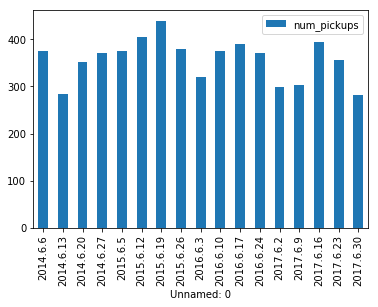

In [111]:
new.plot(kind='bar', x='Unnamed: 0', y=['num_pickups'])

In [112]:
new.iloc[:,0]

3751      2014.6.6
3919     2014.6.13
4087     2014.6.20
4255     2014.6.27
12487     2015.6.5
12655    2015.6.12
12823    2015.6.19
12991    2015.6.26
21223     2016.6.3
21391    2016.6.10
21559    2016.6.17
21727    2016.6.24
29959     2017.6.2
30127     2017.6.9
30295    2017.6.16
30463    2017.6.23
30631    2017.6.30
Name: Unnamed: 0, dtype: object